Results
---

31.03.2022  
* Dataset: "complete" (50 features):  
    * 23 items of FFMQ  
    * 20 items of UPPS-P  
    * 5 items of DMQ-coping  
    * 1 item for weekly working hours  
    * 1 item for sex 
    
* Tested regressors:
    * ElasticNet (scikit-learn)  
    * RandomForestRegressor (scikit-learn)  
    * ExtraTreesRegressor (scikit-learn)  
    * GrdientBoostingRegressor (scikit-learn)  
    * LGBMRegressor (lightgbm)  

## model scores

In [1]:
import pandas as pd


results_path = "./results/2022-03-31_10-06-05/"
results = pd.read_csv(results_path + "report.csv", sep=";", encoding="latin1",index_col=["Type","Split"]).sort_index()
results_grp = results.groupby("Type").mean()[["Train score (R²)","Test score (R²)"]].sort_values("Test score (R²)",ascending=False)

hline =  "\n------------------------------------------\n"
hdline = "\n==========================================\n"

print("(train R², test R²)")

for reg in results.index.levels[0]:
    print(hdline,"# "+reg + "  => ",format(results_grp.loc[reg][0],".3f")+", "+format(results_grp.loc[reg][1],".3f"),"(mean)",hdline)
    for split in results.index.levels[1]:
        print(hline,"## Split",str(split) + "  => ",format(results.loc[(reg,split)][1],".3f")+", "+format(results.loc[(reg,split)][2],".3f"),hline)
        print(results.loc[(reg,split),"Model"].replace("(","").replace(")","").replace(reg,"").replace(" ","").replace(",","\n").replace("\n\n","\n"))

(train R², test R²)

 # ElasticNet  =>  0.403, 0.333 (mean) 


------------------------------------------
 ## Split 1  =>  0.405, 0.360 
------------------------------------------

alpha=0.18732844811285773
l1_ratio=1.0

------------------------------------------
 ## Split 2  =>  0.356, 0.333 
------------------------------------------

alpha=0.4591980530028401
l1_ratio=0.44441089963078834

------------------------------------------
 ## Split 3  =>  0.399, 0.329 
------------------------------------------

alpha=0.21312877152099585
l1_ratio=1.0

------------------------------------------
 ## Split 4  =>  0.417, 0.388 
------------------------------------------

alpha=0.1414427663836193
l1_ratio=1.0

------------------------------------------
 ## Split 5  =>  0.438, 0.252 
------------------------------------------

alpha=0.18366059430221943
l1_ratio=1.0

 # ExtraTreesRegressor  =>  0.710, 0.311 (mean) 


------------------------------------------
 ## Split 1  =>  0.515, 0.310 
--------

## feature importance

In [2]:
import os
import json
import numpy as np
from get_data import get_mindfulness as get_data

json_files = [file for file in os.listdir(results_path) if file.lower()[-5:]==".json"]
X,_ = get_data("complete")
features = list(X.columns)
fi_types = ["m_imp","s_imp"]

# create empty dictionary tree
feature_importance = dict()
for reg in results.index.levels[0]:
    feature_importance[reg] = dict()
    for split in results.index.levels[1]:
        feature_importance[reg][split] = dict()
        for x_imp in fi_types:
            feature_importance[reg][split][x_imp] = dict()
            
# fill dictionary
for json_f in json_files:
    with open(results_path + json_f, "r") as fo:
        feat_data = np.array(json.load(fo)).T
    reg = json_f[:json_f.find("_")]
    split = int(json_f[1 + json_f.find("_"):json_f.find("_",1 + json_f.find("_"))])
    x_imp = json_f[-10:-5]
    feat_dict = dict(list(zip(features,feat_data)))
    feature_importance[reg][split][x_imp] = feat_dict

### Model importance
Should i use absolute values?

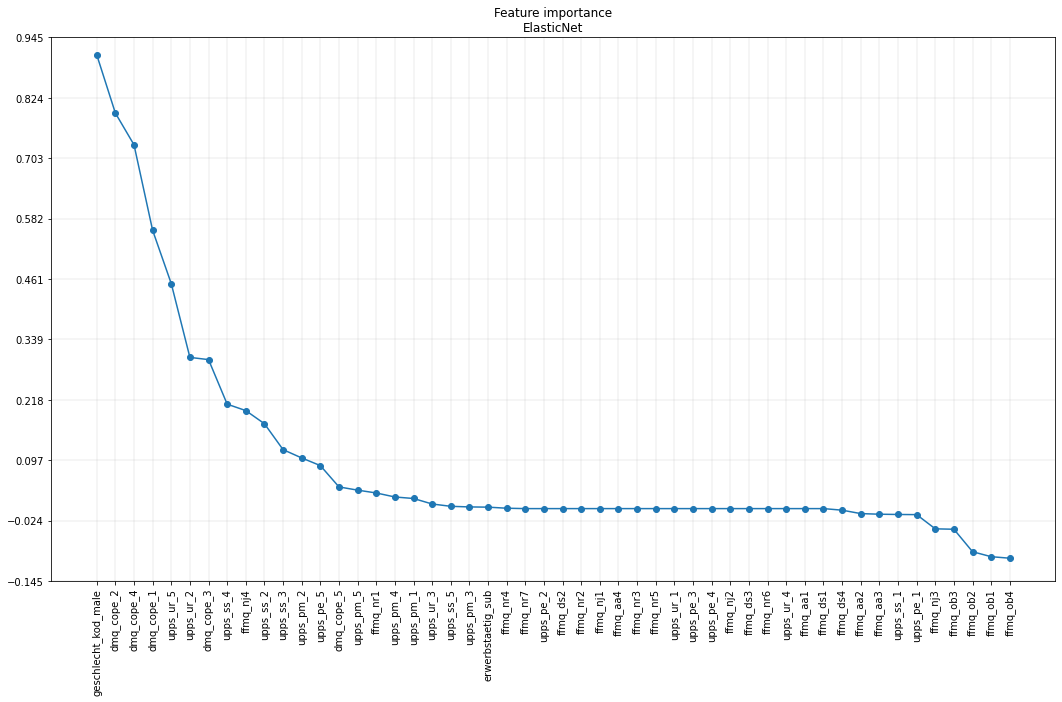

In [161]:
# calculating the mean value over all 5 splits

reg = [i for i in feature_importance.keys()][0]

# sum
for i,split in enumerate(feature_importance[reg]):
    if i > 0:
        df = df + pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")
    else: # for the first iteration
        df = pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")

# divide by number of splits -> mean
df = df/len(feature_importance[reg])
df = df.sort_values("importance",ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Feature importance\n" + reg)
ax.plot(df,marker="o")
ax.grid(linewidth=0.25)
ymin = np.round(df.importance.min(),1) 
ymax = np.round(df.importance.max(),1)
ymin -= (1.05 * ymax - ymax)
ymax *= 1.05
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_ylim(ymin,ymax)
ax.set_xticks(range(len(df)),labels=df.index,rotation=90);

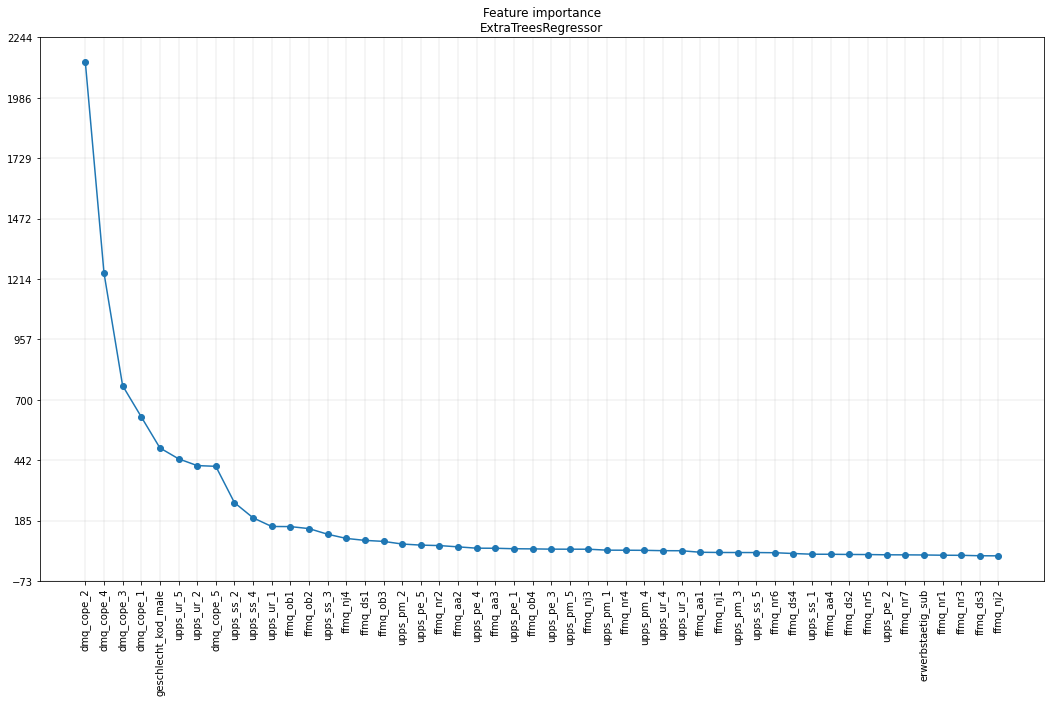

In [159]:
# calculating the mean value over all 5 splits

reg = [i for i in feature_importance.keys()][1]

# sum
for i,split in enumerate(feature_importance[reg]):
    if i > 0:
        df = df + pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")
    else: # for the first iteration
        df = pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")

# divide by number of splits -> mean
df = df/len(feature_importance[reg])
df = df.sort_values("importance",ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Feature importance\n" + reg)
ax.plot(df,marker="o")
ax.grid(linewidth=0.25)
ymin = np.round(df.importance.min(),1) 
ymax = np.round(df.importance.max(),1)
ymin -= (1.05 * ymax - ymax)
ymax *= 1.05
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_ylim(ymin,ymax)
ax.set_xticks(range(len(df)),labels=df.index,rotation=90);

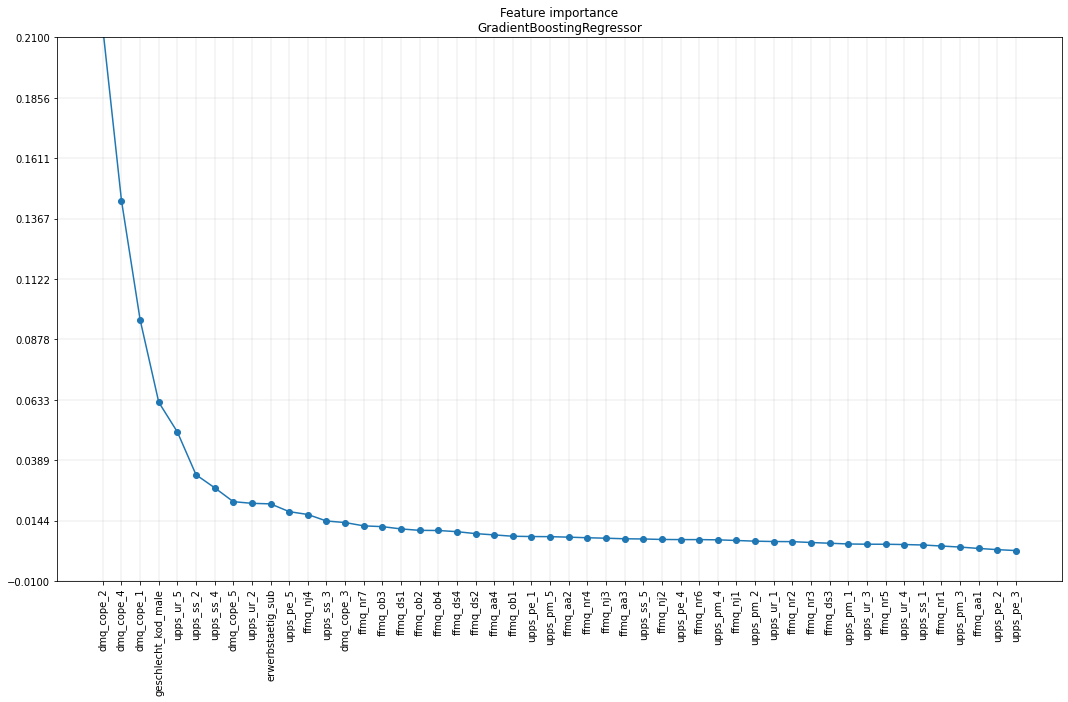

In [163]:
# calculating the mean value over all 5 splits

reg = [i for i in feature_importance.keys()][2]

# sum
for i,split in enumerate(feature_importance[reg]):
    if i > 0:
        df = df + pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")
    else: # for the first iteration
        df = pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")

# divide by number of splits -> mean
df = df/len(feature_importance[reg])
df = df.sort_values("importance",ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Feature importance\n" + reg)
ax.plot(df,marker="o")
ax.grid(linewidth=0.25)
ymin = np.round(df.importance.min(),1) 
ymax = np.round(df.importance.max(),1)
ymin -= (1.05 * ymax - ymax)
ymax *= 1.05
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_ylim(ymin,ymax)
ax.set_xticks(range(len(df)),labels=df.index,rotation=90);

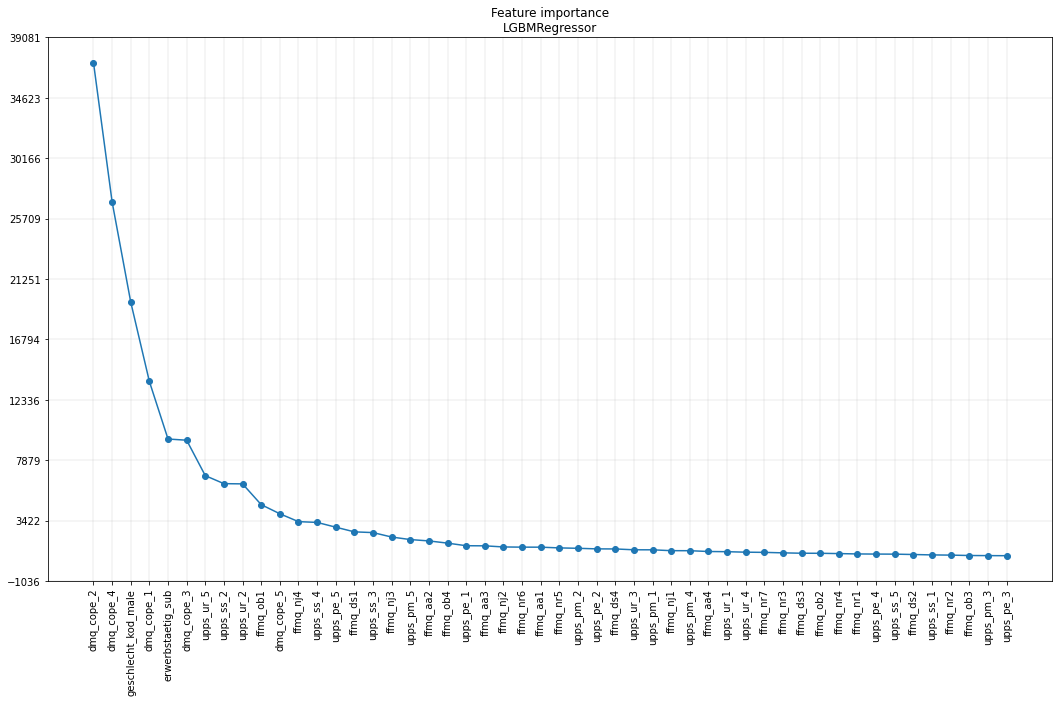

In [164]:
# calculating the mean value over all 5 splits

reg = [i for i in feature_importance.keys()][3]

# sum
for i,split in enumerate(feature_importance[reg]):
    if i > 0:
        df = df + pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")
    else: # for the first iteration
        df = pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")

# divide by number of splits -> mean
df = df/len(feature_importance[reg])
df = df.sort_values("importance",ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Feature importance\n" + reg)
ax.plot(df,marker="o")
ax.grid(linewidth=0.25)
ymin = np.round(df.importance.min(),1) 
ymax = np.round(df.importance.max(),1)
ymin -= (1.05 * ymax - ymax)
ymax *= 1.05
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_ylim(ymin,ymax)
ax.set_xticks(range(len(df)),labels=df.index,rotation=90);

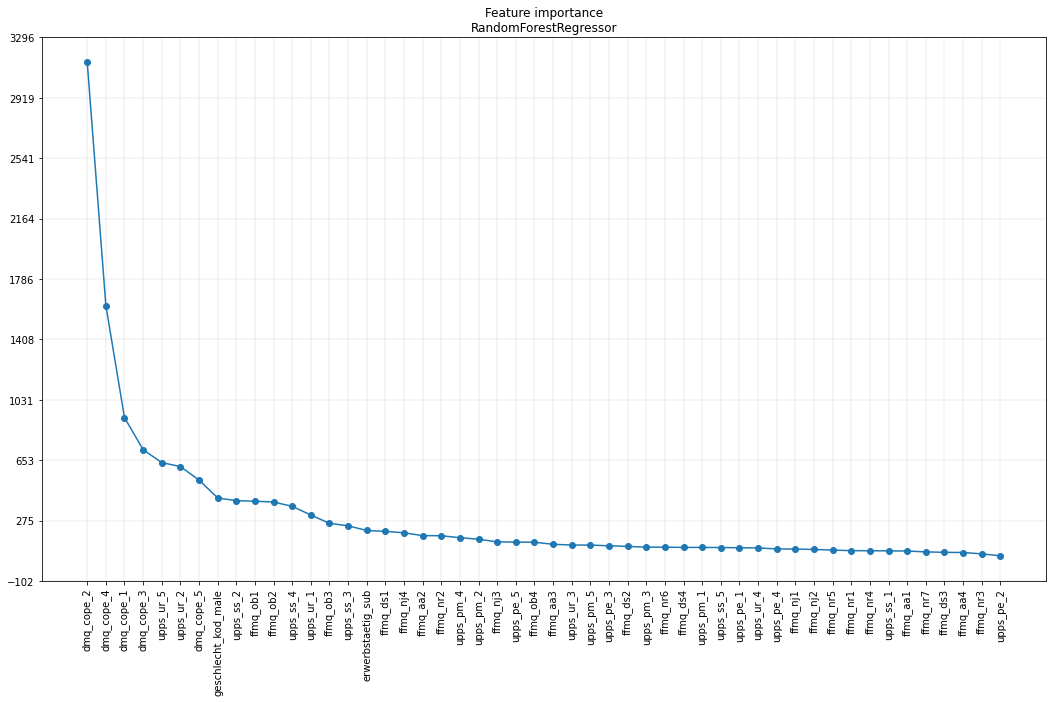

In [165]:
# calculating the mean value over all 5 splits

reg = [i for i in feature_importance.keys()][4]

# sum
for i,split in enumerate(feature_importance[reg]):
    if i > 0:
        df = df + pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")
    else: # for the first iteration
        df = pd.DataFrame(
            feature_importance[reg][split]["m_imp"]\
            .items(),columns=["feature","importance"])\
            .set_index("feature")

# divide by number of splits -> mean
df = df/len(feature_importance[reg])
df = df.sort_values("importance",ascending=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Feature importance\n" + reg)
ax.plot(df,marker="o")
ax.grid(linewidth=0.25)
ymin = np.round(df.importance.min(),1) 
ymax = np.round(df.importance.max(),1)
ymin -= (1.05 * ymax - ymax)
ymax *= 1.05
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_ylim(ymin,ymax)
ax.set_xticks(range(len(df)),labels=df.index,rotation=90);

### SHAP importance 

#### Summary Plot (Example ElasticNet Split 1)



ElasticNet Split 1


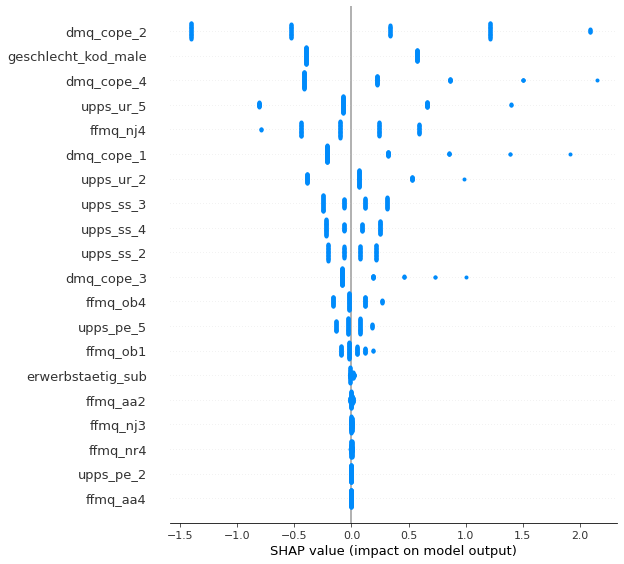

In [259]:
reg = "ElasticNet"
split = 1

with open(results_path + reg + "_" + str(split) + "_s_imp.json", "r") as fo:
        shap_values = np.array(json.load(fo))

feature_names = [key for key in feature_importance[reg][split]["s_imp"].keys()]

print(reg,"Split",split)
shap.summary_plot(shap_values,feature_names=feature_names, title=reg)

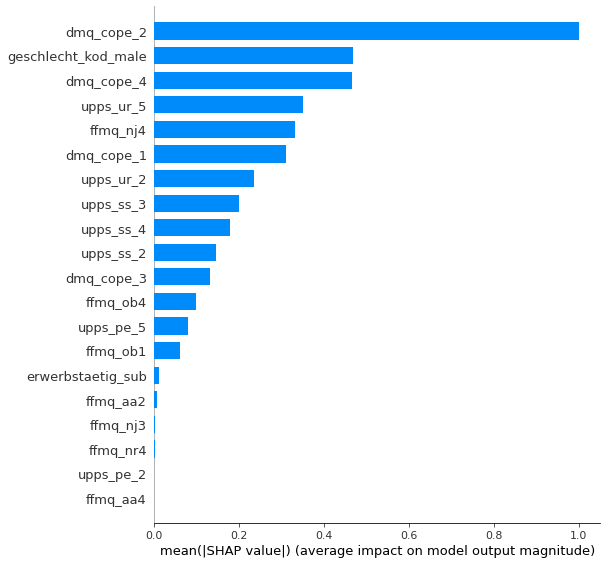

In [260]:
shap.summary_plot(shap_values,feature_names=feature_names, title=reg, plot_type="bar")

#### Histogram: Example ElasticNet Split 1)
Each feature has a 1-dimensional array with 99 values, here shown as a histogram

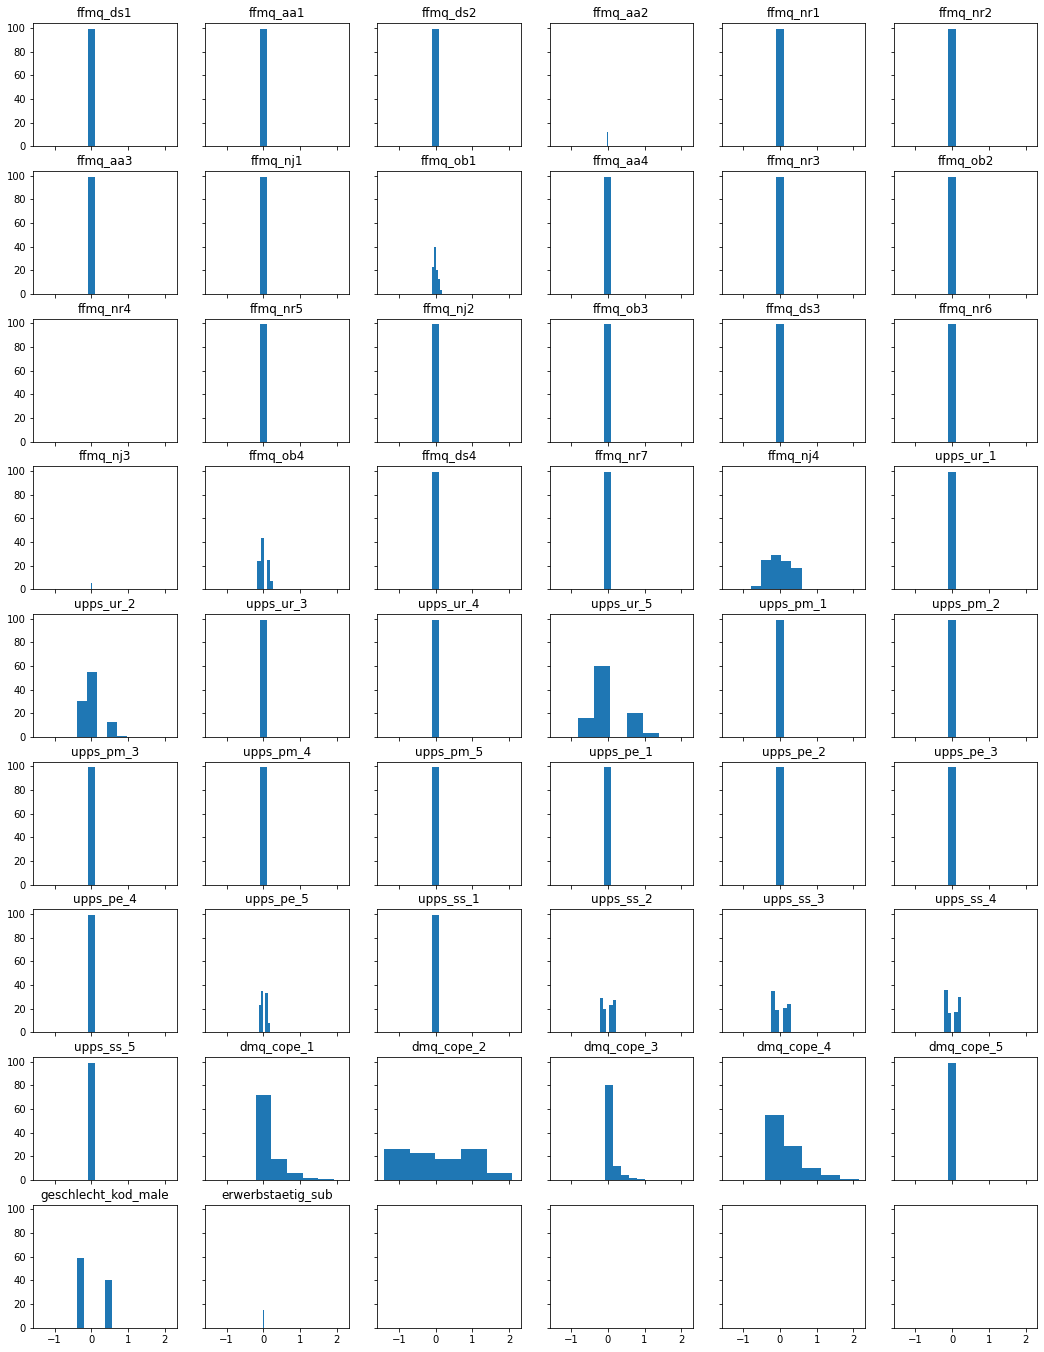

In [261]:
# plot
nrows = 9
ncols = 6

plt.subplots(nrows,ncols,figsize=(18,24),sharex=True,sharey=True)

for i,feat_mat in enumerate(feature_importance[reg][split]["s_imp"]):

    plt.subplot(nrows,ncols,i + 1)
    plt.hist(feature_importance[reg][split]["s_imp"][feat_mat], bins=5)
    plt.title(feat_mat)

#### Summary (Example ElasticNet Split 1)

In [264]:
shap_sum = np.abs(shap_values).mean(axis=0)

importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T

importance_df.columns = ['feature', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df.set_index("feature")

,shap_importance
feature,
dmq_cope_2,1.000336
geschlecht_kod_male,0.467544
dmq_cope_4,0.466581
upps_ur_5,0.35059
ffmq_nj4,0.331316
dmq_cope_1,0.311812
upps_ur_2,0.23471
upps_ss_3,0.201117
upps_ss_4,0.18007
